## Market Basket Analysis using Apriori Algorithm

Market Basket Analysis is a popular data mining technique used to identify associations between items in large datasets. This notebook demonstrates the use of the Apriori algorithm to find frequent itemsets and generate association rules from a transactional dataset.

The Apriori algorithm works by identifying the frequent individual items in the dataset and extending them to larger and larger itemsets as long as those itemsets appear sufficiently often in the dataset. The key concepts involved in this process are:
- **Support**: The proportion of transactions that contain the itemset.
- **Confidence**: The likelihood that a transaction containing item A also contains item B.
- **Lift**: The ratio of the observed support to that expected if A and B were independent.

In this notebook, we will:
1. Load and preprocess the dataset.
2. Generate frequent itemsets using the Apriori algorithm.
3. Derive association rules from the frequent itemsets.
4. Visualize the top associations.
5. Build a simple recommendation system based on the association rules.

### Apriori
All subsets of a frequent itemset must be frequent(Apriori property). If an itemset is infrequent, all its supersets will be infrequent.

Original application in market basket analysis, the Apriori algorithm has found use in diverse fields like recommendation systems, bioinformatics, and network analysis. Its adaptability and simplicity have inspired various enhancements, addressing scalability and extending its capabilities to capture more complex relationships.

In [1]:
!pip install apyori

In [2]:
from apyori import apriori
import pandas as pd

# Load CSV file
df = pd.read_csv("data.csv")
df.head()

#this dataset contains 7500 rows

,chutney,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,knor,ginger garlic paste,MTR Idli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,turkey,spirit fish,tomatoes,spaghetti,mineral water,patanjali tea,salmon,eggs,chicken,cadbury white chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kinley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,eggs,chicken,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


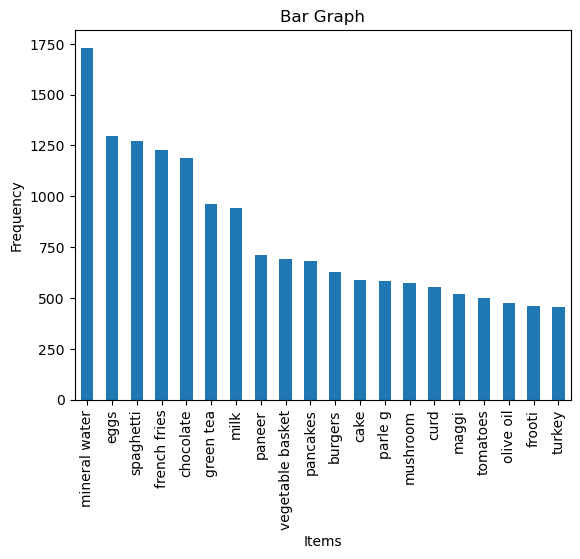

In [3]:
#data visualisation
from matplotlib import pyplot as plt

# Flatten the DataFrame into a single list of items
items = [item for row in df.values for item in row]

# Drop NaN values and count the frequency of each item
item_counts = pd.Series(items).dropna().value_counts()

# Plot histogram
item_counts[:20].plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Bar Graph')
plt.show()


In [4]:
#preprocess data into a list of transactions
transactions = []

for i in range(0, 7218):
  transactions.append([str(df.values[i,j]) for j in range(0, 20)])

## Apriori Training on Dataset

In [5]:
from apyori import apriori
rules = apriori(
    transactions=transactions,
    min_support=0.005,
    min_confidence=0.1,
    min_lift=3,
    min_length=2,
    max_length=2
)

In [6]:
res=list(rules)


In [7]:
print(res)

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005403158769742311, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.26530612244897955, lift=3.059072830410119)]), RelationRecord(items=frozenset({'paneer', 'buns'}), support=0.016070933776669436, ordered_statistics=[OrderedStatistic(items_base=frozenset({'buns'}), items_add=frozenset({'paneer'}), confidence=0.3240223463687151, lift=3.2848220450693617), OrderedStatistic(items_base=frozenset({'paneer'}), items_add=frozenset({'buns'}), confidence=0.16292134831460675, lift=3.2848220450693617)]), RelationRecord(items=frozenset({'vegetable basket', 'fruit basket'}), support=0.005541701302299806, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit basket'}), items_add=frozenset({'vegetable basket'}), confidence=0.29411764705882354, lift=3.0811918381285754)]), RelationRecord(items=frozenset({'kissan puree', 'paneer'}), support=0.005403158769742

## Proper Display

In [8]:
def inspect(results):
    product1         = [tuple(result[2][0][0])[0] for result in results]
    product2         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(product1, product2, supports, confidences, lifts))
DataFrame_intelligence = pd.DataFrame(inspect(res), columns = ['product1', 'product2', 'Support', 'Confidence', 'Lift'])
     

In [9]:
DataFrame_intelligence


,product1,product2,Support,Confidence,Lift
0,almonds,burgers,0.005403,0.265306,3.059073
1,buns,paneer,0.016071,0.324022,3.284822
2,fruit basket,vegetable basket,0.005542,0.294118,3.081192
3,kissan puree,paneer,0.005403,0.378641,3.838524
4,pasta,mushroom,0.005403,0.386139,4.872637
5,pepper spray,mushroom,0.005819,0.302158,3.812899
6,olive oil,whole wheat pasta,0.007758,0.118143,4.060759


In [10]:
top_associations = DataFrame_intelligence.nlargest(n=20, columns='Lift')
print("Top Associations:")
print(top_associations)


Top Associations:
       product1           product2   Support  Confidence      Lift
4         pasta           mushroom  0.005403    0.386139  4.872637
6     olive oil  whole wheat pasta  0.007758    0.118143  4.060759
3  kissan puree             paneer  0.005403    0.378641  3.838524
5  pepper spray           mushroom  0.005819    0.302158  3.812899
1          buns             paneer  0.016071    0.324022  3.284822
2  fruit basket   vegetable basket  0.005542    0.294118  3.081192
0       almonds            burgers  0.005403    0.265306  3.059073


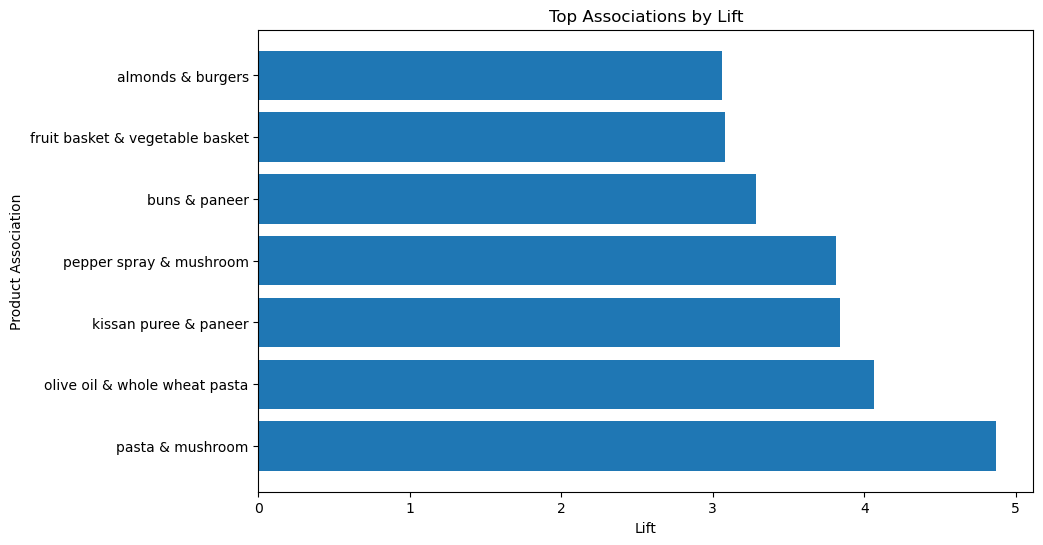

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(top_associations['product1'] + ' & ' + top_associations['product2'], top_associations['Lift'])
plt.xlabel('Lift')
plt.ylabel('Product Association')
plt.title('Top Associations by Lift')
plt.show()
     

## Recommendation System

In [12]:
# User Input
user_item = input("Enter an item: ")

# Find related items using association rules
related_items = []
for result in res:
    items = list(result.items)
    if user_item in items:
        related_items.extend([item for item in items if item != user_item])

# Display related items and recommendations
print("Related Items:")
for item in related_items:
    print(item)

# Select top N items for recommendations
top_recommendations = sorted(related_items, key=lambda item: result.ordered_statistics[0].confidence, reverse=True)[:3]

print("\nYou may also need:")
for recommendation in top_recommendations:
    print(recommendation)


Enter an item: paneer
Related Items:
buns
kissan puree

You may also need:
buns
kissan puree


The above is small recommendation system which can handle only known values

In [13]:
def get_recommendations(user_item, rules_df):
    related_items = []
    for _, row in rules_df.iterrows():
        if user_item == row['product1']:
            related_items.append((row['product2'], row['Confidence'], row['Lift']))
        elif user_item == row['product2']:
            related_items.append((row['product1'], row['Confidence'], row['Lift']))
    
    if related_items:
        # Sort related items by confidence and lift
        related_items.sort(key=lambda x: (x[1], x[2]), reverse=True)
        top_recommendations = related_items[:3]
        return top_recommendations
    else:
        # If no related items, return an empty list
        return []

# User Input
user_item = input("Enter an item: ")

# Get recommendations
recommendations = get_recommendations(user_item, DataFrame_intelligence)

# Display recommendations
if recommendations:
    print("\nYou may also need:")
    for item, confidence, lift in recommendations:
        print(f"{item} (Confidence: {confidence:.2f}, Lift: {lift:.2f})")
else:
    print("No recommendations found for the item you entered.")


Enter an item: almonds

You may also need:
burgers (Confidence: 0.27, Lift: 3.06)


Here I am trying to handle inputs which is not there in the data

## Taking user feedback for recommendations

Here we will take users feedback if item is not found and this will allow increase our data and give recommendations

In [14]:
import pandas as pd

def inspect(results):
    product1 = [tuple(result[2][0][0])[0] for result in results]
    product2 = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(product1, product2, supports, confidences, lifts))

# Convert results to a DataFrame
DataFrame_intelligence = pd.DataFrame(inspect(res), columns=['product1', 'product2', 'Support', 'Confidence', 'Lift'])

# Function get recommendation based on user input
def get_recommendations(user_item, rules_df, confidence_threshold=0.2, lift_threshold=1.0):
    related_items = []
    for _, row in rules_df.iterrows():
        if user_item == row['product1'] and row['Confidence'] >= confidence_threshold and row['Lift'] >= lift_threshold:
            related_items.append((row['product2'], row['Confidence'], row['Lift']))
        elif user_item == row['product2'] and row['Confidence'] >= confidence_threshold and row['Lift'] >= lift_threshold:
            related_items.append((row['product1'], row['Confidence'], row['Lift']))
    
    if related_items:
        # Sort related items by confidence and lift
        related_items.sort(key=lambda x: (x[1], x[2]), reverse=True)
        top_recommendations = related_items[:3]
        return top_recommendations
    else:
        #empty list if no related items are found
        return []

# Function to display recommendations with justifications
def display_recommendations(user_item):
    recommendations = get_recommendations(user_item, DataFrame_intelligence)

    if recommendations:
        print("\nYou may also need:")
        for item, confidence, lift in recommendations:
            print(f"{item} (Confidence: {confidence:.2f}, Lift: {lift:.2f}) - because customers who bought {user_item} also bought {item}.")
    else:
        print("No strong recommendations found for the item you entered.")
        new_items = input(f"What would you like to buy along with {user_item}? (Enter items separated by commas): ").strip().split(',')
        new_items = [item.strip() for item in new_items]
        add_new_association(user_item, new_items)
        # Display recommendations after adding new 
        display_recommendations(user_item)

# Function to add a new association
def add_new_association(item1, item2):
    global DataFrame_intelligence
    new_row = pd.DataFrame({
        'product1': [item1],
        'product2': [item2],
        'Support': [0.001],  
        'Confidence': [0.5],  
        'Lift': [2.0]  #
    })
    DataFrame_intelligence = pd.concat([DataFrame_intelligence, new_row], ignore_index=True)
    print(f"New association added: {item1} -> {item2}")

# Main loop for user interaction
while True:
    user_item = input("\nEnter an item (or type 'exit' to quit): ").strip()
    if user_item.lower() == 'exit':
        break
    display_recommendations(user_item)

print("Thank you for using the recommendation system!")



Enter an item (or type 'exit' to quit): sugar
No strong recommendations found for the item you entered.
What would you like to buy along with sugar? (Enter items separated by commas): milk, cofee powder
New association added: sugar -> ['milk', 'cofee powder']

You may also need:
['milk', 'cofee powder'] (Confidence: 0.50, Lift: 2.00) - because customers who bought sugar also bought ['milk', 'cofee powder'].

Enter an item (or type 'exit' to quit): sugar

You may also need:
['milk', 'cofee powder'] (Confidence: 0.50, Lift: 2.00) - because customers who bought sugar also bought ['milk', 'cofee powder'].

Enter an item (or type 'exit' to quit): ketchup
No strong recommendations found for the item you entered.
What would you like to buy along with ketchup? (Enter items separated by commas): chilli, maggi, potato
New association added: ketchup -> ['chilli', 'maggi', 'potato']

You may also need:
['chilli', 'maggi', 'potato'] (Confidence: 0.50, Lift: 2.00) - because customers who bought ket

## Report:

In this Colab, we apply the Apriori algorithm, a classical technique for mining associations in transactional data, to uncover meaningful relationships within a dataset of shopping cart items. Here's a breakdown of what each section of the code accomplishes:

### -Data Loading and Preprocessing
we have a .csv file with transactional data done in Big Basket Application. The data is then preprocessed to create a list of transactions, where each transaction is a list of items purchased.

### -Apriori Algorithm Application
We use the apyori library to apply the Apriori algorithm on the transaction data. The algorithm is configured with various parameters like min_support, min_confidence, and min_lift to filter the associations. Associations with a specific item count (min_length and max_length) are considered.

### -Results Extraction and Organization: 
The raw results from the Apriori algorithm are stored in the results list. We define the inspect function to extract and organize relevant information from the results, including product pairs, support, confidence, and lift. 

### -DataFrame Creation and Formatting:
We create a DataFrame named DataFrame_intelligence using the inspect function to format the results for easier analysis.

### -Top Associations and Visualization: 

The top associations are extracted from the DataFrame based on the highest lift values using the nlargest function. The code can be further expanded to visualize the associations using appropriate charts or graphs.




# Recommendation System Evolution

## Basic Recommendation System

The initial version of our recommendation system provided recommendations based on association rules mined from transaction data. It allowed users to enter an item, and the system would suggest related items based on predefined rules.

### Workflow:
1. User inputs an item.
2. The system retrieves associated items based on predefined rules.
3. Recommendations are displayed to the user.

## Enhanced Recommendation System

To improve the recommendation system, we added the capability for users to provide their recommendations, which are then incorporated into the system's data. This allows for a more dynamic and personalized recommendation experience.

### Workflow:
1. User inputs an item.
2. If no strong recommendations are found, the system prompts the user to enter additional items they would like to buy along with the input item.
3. User provides additional items separated by commas.
4. The system adds these associations to its data.
5. Recommendations are displayed to the user, including the newly added associations.

### Code Changes:
- Added functionality to prompt users for additional items and incorporate their recommendations into the system's data.
- Modified the `add_new_association` function to handle multiple associations.
- Updated the `display_recommendations` function to handle user input for additional items and to display recommendations after adding new associations.